In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
mpl.rc('font',size=11)

## Result Description

Files created:

* `Results/global_homophily_part_{number}.csv` each contains global homophily results for a couple of datasets (other than the large social networks). The columns are 
    - observed_proportion: proportion of filled triangles which are homophilous
    - closed_baseline: proportion of closed triangles which are homophilous
    - node_baseline: expected number of homophilous filled triangles based on the node baseline
    - simplicial_ratio: observed_proportion / closed_baseline
    - hypergraph_ratio: observed_proportion / node_baseline
    - "number filled (hom, total)": tuple of number of homophilous filled triangles and total filled triangles in the data 
    - "number closed (hom, total)": tuple of number of homophilous closed triangles and total closed triangles in the data 


* For the large social network data, the files in `Results/{network}/global_homophily_part_{number}.csv` contains the same information for each subset of the data, where `{network}` is one of `youtube, orkut, flickr`, or `livejournal`.


* `Results/gbootstrap_{dataset}.csv` contains bootstrapping results for each of the datasets other than large social network data. For large social network data, the same bootstrapping info is available in `Results/{dataset}/gbootstrap_{dataset_with_partition_number}.csv`

In [2]:
nonlsn_datasets = ["cont-hospital", "cont-workplace-13", "cont-workplace-15", 
                "cont-village", "hosp-DAWN", "email-Enron", 
                "bills-senate", "bills-house", "coauth-dblp",
                "cont-primary-school", "cont-high-school",
                "retail-trivago"]

lsn_datasets = ["soc-youtube", "soc-orkut", "soc-flickr", "soc-livejournal"]

all_datasets = nonlsn_datasets + lsn_datasets

## Figure 1

A scatterplot comparing the two homophily scores in each dataset. Confidence intervals can be computed with the bootstrap files.

In [3]:
# For non lsn, load data
data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/global_homophily_part_'+str(i)+'.csv')
    data = pd.concat([data, i_data])

In [4]:
# For lsn, load data
# Youtube
you_data = pd.DataFrame()
for i in range(1,2):
    i_data = pd.read_csv('../Results/soc-youtube/global_homophily_part_'+str(i)+'.csv')
    you_data = pd.concat([you_data, i_data])
    
# Orkut
orkut_data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/soc-orkut/global_homophily_part_'+str(i)+'.csv')
    orkut_data = pd.concat([orkut_data, i_data])
    
# Flickr
flickr_data = pd.DataFrame()
for i in range(1,6):
    i_data = pd.read_csv('../Results/soc-flickr/global_homophily_part_'+str(i)+'.csv')
    flickr_data = pd.concat([flickr_data, i_data])
    
# LiveJournal
live_data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/soc-livejournal/global_homophily_part_'+str(i)+'.csv')
    live_data = pd.concat([live_data, i_data])
    

In [5]:
# Combine data
data = data[['dataset', 'simplicial_ratio', 'hypergraph_ratio']]

# Orkut
simp_orkut = orkut_data.simplicial_ratio.mean()
hyp_orkut = orkut_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-orkut', 'simplicial_ratio': simp_orkut, 'hypergraph_ratio': hyp_orkut}
data = data.append(df2, ignore_index = True)

# youtube
simp_youtube = you_data.simplicial_ratio.mean()
hyp_youtube = you_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-youtube', 'simplicial_ratio': simp_youtube, 'hypergraph_ratio': hyp_youtube}
data = data.append(df2, ignore_index = True)

# flickr
simp_flickr = flickr_data.simplicial_ratio.mean()
hyp_flickr = flickr_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-flickr', 'simplicial_ratio': simp_flickr, 'hypergraph_ratio': hyp_flickr}
data = data.append(df2, ignore_index = True)

# Orkut
simp_live = live_data.simplicial_ratio.mean()
hyp_live = live_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-livejournal', 'simplicial_ratio': simp_live, 'hypergraph_ratio': hyp_live}
data = data.append(df2, ignore_index = True)

In [6]:
data

,dataset,simplicial_ratio,hypergraph_ratio
0,cont-hospital,1.841063,1.507375
1,coauth-dblp,0.994578,1.121430
2,cont-workplace-13,1.099216,1.312091
3,cont-primary-school,2.937876,15.137376
4,cont-workplace-15,1.116418,2.166742
5,cont-high-school,0.953240,4.200367
6,cont-village,1.145719,4.461018
7,retail-trivago,0.155230,16.792989
8,hosp-DAWN,1.971192,3.973396
9,email-Enron,1.058575,1.195217


In [7]:
# Group Lists
contact_datasets = ["cont-hospital", "cont-workplace-13", "cont-workplace-15", 
                "cont-village", "cont-primary-school", "cont-high-school"]

email_datasets = ["email-Enron"]

coauthorship_datasets = ["coaut-dblp"]

political_datasets = ["bills-senate", "bills-house", ]

drug_datasets = ["hosp-DAWN"]

retail_datasets = ["retail-trivago"]

lsn_datasets = ["soc-youtube", "soc-orkut", "soc-flickr", "soc-livejournal"]

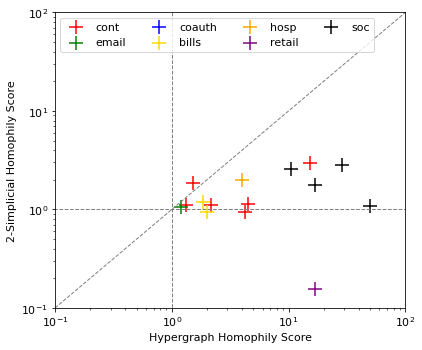

In [8]:

for ind, row in data.iterrows():
    if row['dataset'] in contact_datasets:
        data.loc[ind, 'Category'] = 'cont'
    elif row['dataset'] in email_datasets:
        data.loc[ind, 'Category'] = 'email'
    elif row['dataset'] in coauthorship_datasets:
        data.loc[ind, 'Category'] = 'coauth'
    elif row['dataset'] in political_datasets:
        data.loc[ind, 'Category'] = 'bills'
    elif row['dataset'] in drug_datasets:
        data.loc[ind, 'Category'] = 'hosp'
    elif row['dataset'] in retail_datasets:
        data.loc[ind, 'Category'] = "retail"
    elif row['dataset'] in lsn_datasets:
        data.loc[ind, 'Category'] = 'soc'
        
# Set color code
colors = {'cont':'red', 'email':'green', 'coauth':'blue', 
          'bills':'gold', 'hosp':'orange', "retail":'purple', 'soc':'black'}

data['scattercolor'] = data['Category'].map(colors)

# # Plot
fig, ax = plt.subplots(figsize=(6,5))

for label, color in colors.items():
    plt.scatter(data[data['scattercolor'] == color]['hypergraph_ratio'], 
              data[data['scattercolor'] == color]['simplicial_ratio'], 
              marker='+', c=color, s=200, label=label)


# Make axis limits the same
ax.set_ylim([0.1, 100])
ax.set_xlim([0.1, 100])


# log scale axes
ax.set_xscale("log")
ax.set_yscale("log")

# Add 45 degree line
ax.axline([0, 0], [1, 1], color='grey', linestyle='dashed', linewidth=1)


ax.hlines(1, 0, 100, color='grey', linestyle='dashed', linewidth=1)

ax.vlines(1, 0, 100, color='grey', linestyle='dashed', linewidth=1)


# Label Axes
ax.set_xlabel('Hypergraph Homophily Score')
ax.set_ylabel('2-Simplicial Homophily Score')

## make legend
ax.legend(loc='upper left', ncol=4)

plt.tight_layout()
# plt.legend(handles=scatter.legend_elements()[0],
#            title="Category")
plt.savefig('scatter_coded.png', dpi=300)

## Regression

### global

In [9]:
# For non lsn, load data
data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/global_homophily_part_'+str(i)+'.csv')
    data = pd.concat([data, i_data])

In [10]:
# For lsn, load data
# Youtube
you_data = pd.DataFrame()
for i in range(1,2):
    i_data = pd.read_csv('../Results/soc-youtube/global_homophily_part_'+str(i)+'.csv')
    you_data = pd.concat([you_data, i_data])
    
# Orkut
orkut_data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/soc-orkut/global_homophily_part_'+str(i)+'.csv')
    orkut_data = pd.concat([orkut_data, i_data])
    
# Flickr
flickr_data = pd.DataFrame()
for i in range(1,6):
    i_data = pd.read_csv('../Results/soc-flickr/global_homophily_part_'+str(i)+'.csv')
    flickr_data = pd.concat([flickr_data, i_data])
    
# LiveJournal
live_data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/soc-livejournal/global_homophily_part_'+str(i)+'.csv')
    live_data = pd.concat([live_data, i_data])
    

In [11]:
# Combine data
data = data[['dataset', 'simplicial_ratio', 'hypergraph_ratio']]

# Orkut
simp_orkut = orkut_data.simplicial_ratio.mean()
hyp_orkut = orkut_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-orkut', 'simplicial_ratio': simp_orkut, 'hypergraph_ratio': hyp_orkut}
data = data.append(df2, ignore_index = True)

# youtube
simp_youtube = you_data.simplicial_ratio.mean()
hyp_youtube = you_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-youtube', 'simplicial_ratio': simp_youtube, 'hypergraph_ratio': hyp_youtube}
data = data.append(df2, ignore_index = True)

# flickr
simp_flickr = flickr_data.simplicial_ratio.mean()
hyp_flickr = flickr_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-flickr', 'simplicial_ratio': simp_flickr, 'hypergraph_ratio': hyp_flickr}
data = data.append(df2, ignore_index = True)

# Orkut
simp_live = live_data.simplicial_ratio.mean()
hyp_live = live_data.hypergraph_ratio.mean()
df2 = {'dataset': 'soc-livejournal', 'simplicial_ratio': simp_live, 'hypergraph_ratio': hyp_live}
data = data.append(df2, ignore_index = True)

In [12]:
global_data = data.copy()

### edge

In [13]:
# For non lsn, load data
data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/edge_homophily_part_'+str(i)+'.csv')
    data = pd.concat([data, i_data])

In [14]:
# For lsn, load data
# Youtube
you_data = pd.DataFrame()
for i in range(1,2):
    i_data = pd.read_csv('../Results/soc-youtube/edge_homophily_part_'+str(i)+'.csv')
    you_data = pd.concat([you_data, i_data])
    
# Orkut
orkut_data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/soc-orkut/edge_homophily_part_'+str(i)+'.csv')
    orkut_data = pd.concat([orkut_data, i_data])
    
# Flickr
flickr_data = pd.DataFrame()
for i in range(1,6):
    i_data = pd.read_csv('../Results/soc-flickr/edge_homophily_part_'+str(i)+'.csv')
    flickr_data = pd.concat([flickr_data, i_data])
    
# LiveJournal
live_data = pd.DataFrame()
for i in range(1,9):
    i_data = pd.read_csv('../Results/soc-livejournal/edge_homophily_part_'+str(i)+'.csv')
    live_data = pd.concat([live_data, i_data])
    

In [15]:
# Combine data
data = data[['dataset', 'edge_homophily_ratio']]

# Orkut
simp_orkut = orkut_data.edge_homophily_ratio.mean()
df2 = {'dataset': 'soc-orkut', 'edge_homophily_ratio': simp_orkut}
data = data.append(df2, ignore_index = True)

# youtube
simp_youtube = you_data.edge_homophily_ratio.mean()
df2 = {'dataset': 'soc-youtube', 'edge_homophily_ratio': simp_youtube}
data = data.append(df2, ignore_index = True)

# flickr
simp_flickr = flickr_data.edge_homophily_ratio.mean()
df2 = {'dataset': 'soc-flickr', 'edge_homophily_ratio': simp_flickr}
data = data.append(df2, ignore_index = True)

# Orkut
simp_live = live_data.edge_homophily_ratio.mean()
df2 = {'dataset': 'soc-livejournal', 'edge_homophily_ratio': simp_live}
data = data.append(df2, ignore_index = True)

In [16]:
edge_data = data.copy()

### Combine

In [17]:
homophily_df = global_data.merge(edge_data, on = 'dataset')

In [18]:
homophily_df

,dataset,simplicial_ratio,hypergraph_ratio,edge_homophily_ratio
0,cont-hospital,1.841063,1.507375,0.901533
1,coauth-dblp,0.994578,1.121430,1.059497
2,cont-workplace-13,1.099216,1.312091,1.069626
3,cont-primary-school,2.937876,15.137376,1.630380
4,cont-workplace-15,1.116418,2.166742,1.317394
5,cont-high-school,0.953240,4.200367,1.569245
6,cont-village,1.145719,4.461018,1.807987
7,retail-trivago,0.155230,16.792989,8.964654
8,hosp-DAWN,1.971192,3.973396,2.228562
9,email-Enron,1.058575,1.195217,1.058323


### Regress

In [19]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

#### Hypergraph

In [20]:
# Log-log
X = np.log(homophily_df['edge_homophily_ratio'].to_numpy())
Y = np.log(homophily_df['hypergraph_ratio'].to_numpy())
# X = np.column_stack((vac_arr, mob_arr))
# Y = reg_data['gamma_t_3'].to_numpy()
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     32.33
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           5.62e-05
Time:                        00:27:13   Log-Likelihood:                -16.115
No. Observations:                  16   AIC:                             36.23
Df Residuals:                      14   BIC:                             37.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5866      0.249      2.353      0.0

/state/partition1/llgrid/pkg/anaconda/anaconda3-2021a/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Simplicial

In [22]:
# Log-log
X = np.log(homophily_df['edge_homophily_ratio'].to_numpy())
Y = np.log(homophily_df['simplicial_ratio'].to_numpy())
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()

In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2.799
Date:                Thu, 10 Feb 2022   Prob (F-statistic):              0.117
Time:                        00:27:14   Log-Likelihood:                -14.655
No. Observations:                  16   AIC:                             33.31
Df Residuals:                      14   BIC:                             34.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4928      0.228      2.166      0.0

/state/partition1/llgrid/pkg/anaconda/anaconda3-2021a/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Plot

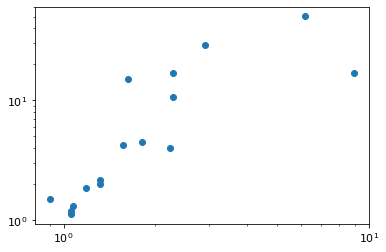

In [24]:
fig, ax = plt.subplots()

plt.scatter(homophily_df['edge_homophily_ratio'], homophily_df['hypergraph_ratio'])
ax.set_yscale('log')
ax.set_xscale('log')

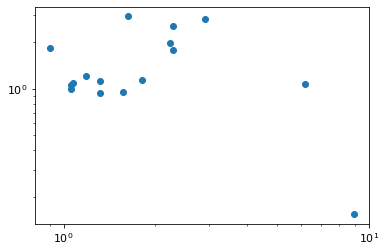

In [25]:
fig, ax = plt.subplots()

plt.scatter(homophily_df['edge_homophily_ratio'], homophily_df['simplicial_ratio'])
ax.set_yscale('log')
ax.set_xscale('log')